In [7]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib.inline

UsageError: Line magic function `%` not found.


In [8]:
with zipfile.ZipFile('armenian-online-job-postings.zip','r') as myzip:
    myzip.extractall()

In [9]:
df=pd.read_csv(r"C:\Users\Sparsh\Desktop\Data Science\Job Opening\online-job-postings.csv")

In [11]:
df.head(3)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [13]:
df_clean=df.copy()

In [17]:
df_clean=df_clean.rename(columns={'ApplicationP':'ApplicationProcedure','AboutC':'AboutCompany','RequiredQual':'RequiredQualifications','JobRequirment':'JobRequirements'})

In [19]:
df_clean['StartDate'].value_counts()

ASAP                              4754
Immediately                        773
As soon as possible                543
Upon hiring                        261
Immediate                          259
                                  ... 
06 October 2008                      1
24 August 2008                       1
Preferably early-November 2013       1
22 July 2004                         1
10 February 2010                     1
Name: StartDate, Length: 1186, dtype: int64

In [20]:
asap_list = ['Immediately', 'As soon as possible', 'Upon hiring',
             'Immediate', 'Immediate employment', 'As soon as possible.', 'Immediate job opportunity',
             '"Immediate employment, after passing the interview."',
             'ASAP preferred', 'Employment contract signature date',
             'Immediate employment opportunity', 'Immidiately', 'ASA',
             'Asap', '"The position is open immediately but has a flexible start date depending on the candidates earliest availability."',
             'Immediately upon agreement', '20 November 2014 or ASAP',
             'immediately', 'Immediatelly',
             '"Immediately upon selection or no later than November 15, 2009."',
             'Immediate job opening', 'Immediate hiring', 'Upon selection',
             'As soon as practical', 'Immadiate', 'As soon as posible',
             'Immediately with 2 months probation period',
             '12 November 2012 or ASAP', 'Immediate employment after passing the interview',
             'Immediately/ upon agreement', '01 September 2014 or ASAP',
             'Immediately or as per agreement', 'as soon as possible',
             'As soon as Possible', 'in the nearest future', 'immediate',
             '01 April 2014 or ASAP', 'Immidiatly', 'Urgent',
             'Immediate or earliest possible', 'Immediate hire',
             'Earliest  possible', 'ASAP with 3 months probation period.',
             'Immediate employment opportunity.', 'Immediate employment.',
             'Immidietly', 'Imminent', 'September 2014 or ASAP', 'Imediately']

In [21]:
for phase in asap_list:
    df_clean['StartDate'].replace(phase,'ASAP',inplace=True)

In [22]:
df_clean['StartDate'].value_counts()

ASAP                       6856
01 September 2012            31
March 2006                   27
November 2006                22
January 2010                 19
                           ... 
Beginning of July, 2007       1
15 February 2014              1
14 February 2005              1
25 November 2004              1
10 February 2010              1
Name: StartDate, Length: 1140, dtype: int64

In [24]:
#checking
for phase in asap_list: 
    assert   phase not in df_clean['StartDate'].values

### Analysis and Visualisation

In [34]:
# no. of ASAP Start dates
asap_count=df_clean['StartDate'].value_counts()['ASAP']
asap_count

6856

In [35]:
# no. of non empty Start dates
non_empty_counts=df_clean['StartDate'].count()
non_empty_counts

9675

In [36]:
# percentage
asap_count/non_empty_counts

0.7086304909560723

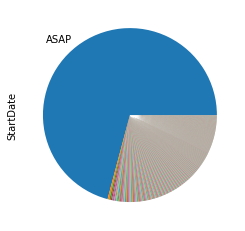

In [41]:
labels=np.full(len(df_clean['StartDate'].value_counts()),'',dtype=object)  # returns an array with shape,value and type mentioned
labels[0]='ASAP'

df_clean['StartDate'].value_counts().plot(kind='pie',labels=labels)

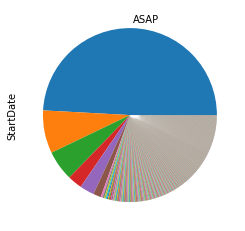

In [49]:
# original dataset before cleaning

labels=np.full(len(df['StartDate'].value_counts()),'',dtype=object)  # returns an array with shape,value and type mentioned
labels[0]='ASAP'

df['StartDate'].value_counts().plot(kind='pie',labels=labels)